In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv("BHP.csv")
df1.shape

(13320, 9)

In [3]:
df1.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [4]:
df2 = df1.drop(["availability","society","area_type","balcony"],axis="columns")
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [5]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [6]:
df3 = df2.dropna(subset=['location', 'size', 'total_sqft', 'bath', 'price'])
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [7]:
df3["bhk"] = df3["size"].apply(lambda x : float(x.split()[0]))

C:\Users\S HITESH\AppData\Local\Temp\ipykernel_24052\1956285189.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["bhk"] = df3["size"].apply(lambda x : float(x.split()[0]))


In [8]:
df4 = df3.drop(["size"],axis="columns")
df4.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2.0
1,Chikka Tirupathi,2600,5.0,120.00,4.0
2,Uttarahalli,1440,2.0,62.00,3.0
3,Lingadheeranahalli,1521,3.0,95.00,3.0
4,Kothanur,1200,2.0,51.00,2.0


In [9]:
def is_float(x):
    try:
        float(x) 
    except:
        return False
    return True

In [10]:
df4["total_sqft"][~df4["total_sqft"].apply(is_float)].unique()

array(['2100 - 2850', '3067 - 8156', '1042 - 1105', '1145 - 1340',
       '1015 - 1540', '34.46Sq. Meter', '1195 - 1440', '4125Perch',
       '1120 - 1145', '3090 - 5002', '1160 - 1195', '1000Sq. Meter',
       '1115 - 1130', '1100Sq. Yards', '520 - 645', '1000 - 1285',
       '650 - 665', '633 - 666', '5.31Acres', '30Acres', '1445 - 1455',
       '884 - 1116', '850 - 1093', '716Sq. Meter', '547.34 - 827.31',
       '580 - 650', '3425 - 3435', '1804 - 2273', '3630 - 3800',
       '4000 - 5249', '1500Sq. Meter', '142.61Sq. Meter', '1574Sq. Yards',
       '1250 - 1305', '670 - 980', '1005.03 - 1252.49', '1004 - 1204',
       '361.33Sq. Yards', '645 - 936', '2710 - 3360', '2830 - 2882',
       '596 - 804', '1255 - 1863', '1300 - 1405', '117Sq. Yards',
       '934 - 1437', '980 - 1030', '2249.81 - 4112.19', '1070 - 1315',
       '3040Sq. Meter', '500Sq. Yards', '2806 - 3019', '613 - 648',
       '704 - 730', '1210 - 1477', '3369 - 3464', '1125 - 1500',
       '167Sq. Meter', '1076 - 1199',

In [11]:
def convert_range(x):
    tokens = x.split("-") 
    if len(tokens)==2:
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None




In [12]:
"""
import re
def convert_units(x):
    if(type(x)!=float):
        y = x.replace(" ", "")
        print(y)
        pattern = r'(\d+(\.\d+)?)\s*([A-Za-z\.]+)'
        match = re.match(pattern,y)
        if(match):
            number = float(match.group(1))
            unit = match.group(3)
            #print(number)
            #print(unit)
            if(unit == "Sq.Meter"):
                return number*10.7639
            if(unit == "Perch"):
                return number*272.25
            if(unit == "Sq.Yards"):
                return number*9
            if(unit == "Acres"):
                return number*43560
            if(unit == "Guntha"):
                return number*1089
            if(unit == "Cents"):
                return number*435.6 
            if(unit == "Grounds"):
                return number*2400
        else:
            return x
    else:
        return x
"""

'\nimport re\ndef convert_units(x):\n    if(type(x)!=float):\n        y = x.replace(" ", "")\n        print(y)\n        pattern = r\'(\\d+(\\.\\d+)?)\\s*([A-Za-z\\.]+)\'\n        match = re.match(pattern,y)\n        if(match):\n            number = float(match.group(1))\n            unit = match.group(3)\n            #print(number)\n            #print(unit)\n            if(unit == "Sq.Meter"):\n                return number*10.7639\n            if(unit == "Perch"):\n                return number*272.25\n            if(unit == "Sq.Yards"):\n                return number*9\n            if(unit == "Acres"):\n                return number*43560\n            if(unit == "Guntha"):\n                return number*1089\n            if(unit == "Cents"):\n                return number*435.6 \n            if(unit == "Grounds"):\n                return number*2400\n        else:\n            return x\n    else:\n        return x\n'

In [13]:
df5 = df4.copy()
df5["total_sqft"] = df5["total_sqft"].apply(convert_range)
#df5["total_sqft"] = df5["total_sqft"].apply(convert_units)
df5.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2.0
1,Chikka Tirupathi,2600.0,5.0,120.00,4.0
2,Uttarahalli,1440.0,2.0,62.00,3.0
3,Lingadheeranahalli,1521.0,3.0,95.00,3.0
4,Kothanur,1200.0,2.0,51.00,2.0


In [14]:
df6 = df5.copy()
df6["price_per_sqft"] = df6["price"]*100000/df6["total_sqft"]
df6.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4.0,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3.0,6245.890861
4,Kothanur,1200.0,2.0,51.00,2.0,4250.000000


In [15]:
len(df6.location.unique())

1304

In [16]:
df6.location = df6.location.apply(lambda x: x.strip()) 

In [17]:
location_stats = df6.groupby("location")["location"].agg("count").sort_values(ascending=False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [18]:
location_stats_lessthan10 = location_stats[location_stats<=10]
len(location_stats_lessthan10)

1052

In [19]:
df6.location = df6.location.apply(lambda x : "others" if x in location_stats_lessthan10 else x)
df6.head(19)

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4.0,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3.0,6245.890861
4,Kothanur,1200.0,2.0,51.00,2.0,4250.000000
5,Whitefield,1170.0,2.0,38.00,2.0,3247.863248
6,Old Airport Road,2732.0,4.0,204.00,4.0,7467.057101
7,Rajaji Nagar,3300.0,4.0,600.00,4.0,18181.818182
8,Marathahalli,1310.0,3.0,63.25,3.0,4828.244275
9,others,1020.0,6.0,370.00,6.0,36274.509804


In [20]:
df6.shape

(13246, 6)

In [21]:
df7 = df6[~(df6.total_sqft/df6.bhk < 300)]
df7.shape

(12502, 6)

In [22]:
df7.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [23]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key , subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > m-st )&(subdf.price_per_sqft <= m+st)]
        df_out = pd.concat([df_out,reduced_df])
    return df_out
    

In [24]:
df8 = remove_pps_outliers(df7)
df8.shape

(10241, 6)

In [25]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    plt.scatter(bhk2.total_sqft,bhk2.price,color ="blue",label="2 BHK",s=30)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker="+",color ="red",label="3 BHK",s=30)
    plt.xlabel("total sq ft area")
    plt.ylabel("price")
    plt.title(location)
    plt.legend()
    

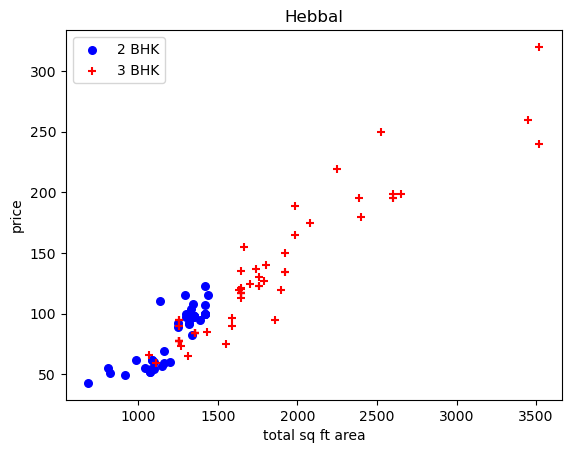

In [26]:
plot_scatter_chart(df8,"Hebbal")

In [27]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={
                'mean' : np.mean(bhk_df.price_per_sqft),
                'std' : np.std(bhk_df.price_per_sqft),
                'count' : bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby("bhk"):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [28]:
df9 = remove_bhk_outliers(df8)

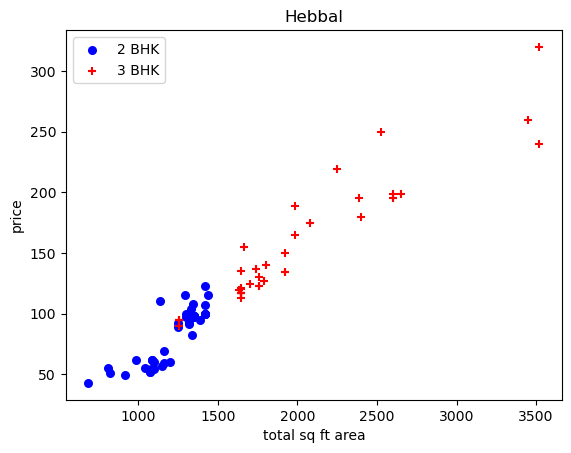

In [29]:
plot_scatter_chart(df9,"Hebbal")

In [30]:
df9.shape

(7329, 6)

Text(0, 0.5, 'count')

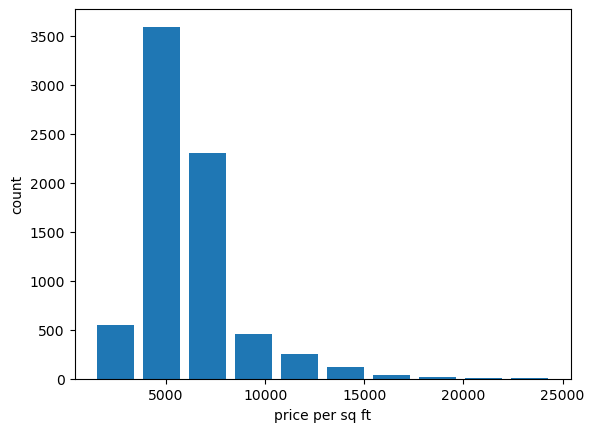

In [31]:
plt.hist(df9.price_per_sqft,rwidth=0.8)
plt.xlabel("price per sq ft")
plt.ylabel("count")

In [32]:
df9.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [33]:
df9[df9.bath>10]

,location,total_sqft,bath,price,bhk,price_per_sqft
8636,Neeladri Nagar,4000.0,12.0,160.0,10.0,4000.000000
3096,others,12000.0,12.0,525.0,10.0,4375.000000
3609,others,10000.0,16.0,550.0,16.0,5500.000000
7979,others,6000.0,12.0,150.0,11.0,2500.000000
9935,others,5425.0,13.0,275.0,13.0,5069.124424


Text(0, 0.5, 'count')

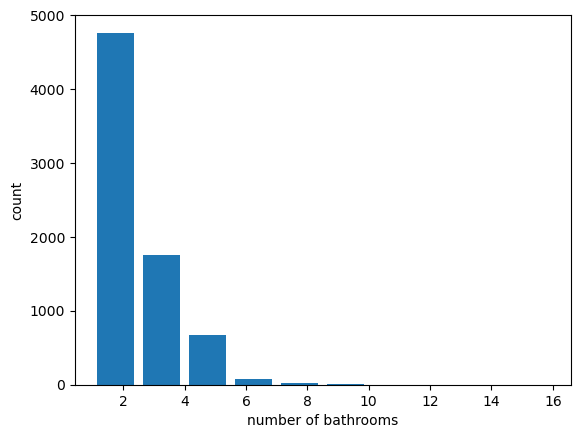

In [34]:
plt.hist(df9.bath,rwidth=0.8)
plt.xlabel("number of bathrooms")
plt.ylabel("count")

In [35]:
df9[df9.bath>df9.bhk+2]

,location,total_sqft,bath,price,bhk,price_per_sqft
7709,Chikkabanavar,2460.0,7.0,80.0,4.0,3252.032520
11366,Nagasandra,7000.0,8.0,450.0,4.0,6428.571429
12103,Thanisandra,1806.0,6.0,116.0,3.0,6423.034330
2620,others,11338.0,9.0,1000.0,6.0,8819.897689


In [36]:
df10 = df9[df9.bath<df9.bhk+2]
df10.shape

(7251, 6)

In [37]:
df11 = df10.drop(['price_per_sqft'],axis="columns")
df11.head(50)

,location,total_sqft,bath,price,bhk
210,1st Block Jayanagar,2850.0,4.0,428.00,4.0
848,1st Block Jayanagar,1630.0,3.0,194.00,3.0
2152,1st Block Jayanagar,1875.0,2.0,235.00,3.0
7138,1st Block Jayanagar,1200.0,2.0,130.00,3.0
7358,1st Block Jayanagar,1235.0,2.0,148.00,2.0
7383,1st Block Jayanagar,2750.0,4.0,413.00,4.0
10972,1st Block Jayanagar,2450.0,4.0,368.00,4.0
2106,1st Phase JP Nagar,1875.0,3.0,167.00,3.0
2292,1st Phase JP Nagar,1500.0,5.0,85.00,5.0
2914,1st Phase JP Nagar,2065.0,4.0,210.00,3.0


In [38]:
df11.isnull().sum()

location      0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

In [39]:
dummies = pd.get_dummies(df11.location)
dummies

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,others
210,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
848,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2152,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7138,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7358,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13285,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13291,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [40]:
df12 = pd.concat([df11.drop("location",axis="columns"),dummies.drop("others",axis="columns")],axis="columns")
df12.head(2)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
210,2850.0,4.0,428.0,4.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
848,1630.0,3.0,194.0,3.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
df12.shape

(7251, 245)

In [42]:
"""
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
# Split the dataset into training and testing sets

X = df12.drop(['balcony'],axis="columns")
y = df12['balcony'].copy()
X_train, X_test, y_train, y_test = train_test_split(X[y.notnull()], y[y.notnull()], test_size=0.2, random_state=42)

# Choose XGBoost as the machine learning model
model = XGBClassifier()

# Train the model
model.fit(X_train, y_train)

# Predict the missing values
predicted_balcony = model.predict(X[y.isnull()])

# Impute the missing values
df12.loc[df12['balcony'].isnull(), 'balcony'] = predicted_balcony

# Calculate the model score on the test set
score = model.score(X_test, y_test)
print("Model score on test set:", score)
"""

'\nfrom xgboost import XGBClassifier\nfrom sklearn.model_selection import train_test_split\n# Split the dataset into training and testing sets\n\nX = df12.drop([\'balcony\'],axis="columns")\ny = df12[\'balcony\'].copy()\nX_train, X_test, y_train, y_test = train_test_split(X[y.notnull()], y[y.notnull()], test_size=0.2, random_state=42)\n\n# Choose XGBoost as the machine learning model\nmodel = XGBClassifier()\n\n# Train the model\nmodel.fit(X_train, y_train)\n\n# Predict the missing values\npredicted_balcony = model.predict(X[y.isnull()])\n\n# Impute the missing values\ndf12.loc[df12[\'balcony\'].isnull(), \'balcony\'] = predicted_balcony\n\n# Calculate the model score on the test set\nscore = model.score(X_test, y_test)\nprint("Model score on test set:", score)\n'

In [43]:
X = df12.drop("price",axis="columns")
y = df12.price


In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [45]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)



LinearRegression()

In [46]:
model.score(X_test,y_test)

0.8452277697874344

In [47]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [48]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'positive': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)


C:\Anaconda2023\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Anaconda2023\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda2023\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Anaconda2023\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Anaconda2023\Lib\site-packages\sklearn\utils\_param_validation.py", line 95,

,model,best_score,best_params
0,linear_regression,0.818354,{'positive': False}
1,lasso,0.687457,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.718634,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [57]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return model.predict([x])[0]

In [50]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

C:\Anaconda2023\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.4990467719377

In [51]:
import pickle
with open("house_price.pickle","wb") as f:
    pickle.dump(model,f)

In [52]:
import json
columns ={
    'data_columns':[col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))